In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

x_train = x_train.astype( 'float32' ) / 255.
x_test = x_test.astype( 'float32' ) / 255.

x_train = np.reshape( x_train, ( len( x_train ), 28, 28, 1 ) )
x_test = np.reshape( x_test, ( len( x_test ), 28, 28, 1 ) )

In [3]:
noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal( loc = 0.0, scale = 1.0, size = x_train.shape )
x_test_noisy = x_test + noise_factor * np.random.normal( loc = 0.0, scale = 1.0, size = x_test.shape )

x_train_noisy = np.clip( x_train_noisy, 0., 1. )
x_test_noisy = np.clip( x_test_noisy, 0., 1. )

In [4]:
input = layers.Input( shape = ( 28, 28, 1 ) )

x = layers.Conv2D( 128, ( 3, 3 ), activation = 'relu', padding = 'same' )( input )
x = layers.MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = layers.Conv2D( 128, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = layers.MaxPooling2D( ( 2, 2 ), padding = 'same' )( x )

x = layers.Conv2D( 128, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

x = layers.Conv2D( 128, ( 3, 3 ), activation = 'relu', padding = 'same' )( x )
x = layers.UpSampling2D( ( 2, 2 ) )( x )

output = layers.Conv2D( 1, ( 3, 3 ), activation = 'sigmoid', padding = 'same' )( x )

In [5]:
autoencoder = keras.models.Model( input, output )
autoencoder.compile( optimizer = 'adadelta', loss = 'binary_crossentropy' )

In [6]:
autoencoder.fit( x_train_noisy, x_train,
                epochs = 100,
                batch_size = 128,
                shuffle = True )

Epoch 1/100
469/469 [==============================] - 9s 20ms/step - loss: 0.6543
Epoch 2/100
469/469 [==============================] - 9s 20ms/step - loss: 0.5633
Epoch 3/100
469/469 [==============================] - 9s 20ms/step - loss: 0.5075
Epoch 4/100
469/469 [==============================] - 9s 20ms/step - loss: 0.4962
Epoch 5/100
469/469 [==============================] - 9s 19ms/step - loss: 0.4866
Epoch 6/100
469/469 [==============================] - 9s 19ms/step - loss: 0.4766
Epoch 7/100
469/469 [==============================] - 9s 19ms/step - loss: 0.4661
Epoch 8/100
469/469 [==============================] - 9s 19ms/step - loss: 0.4544
Epoch 9/100
469/469 [==============================] - 9s 19ms/step - loss: 0.4411
Epoch 10/100
469/469 [==============================] - 9s 19ms/step - loss: 0.4252
Epoch 11/100
469/469 [==============================] - 9s 20ms/step - loss: 0.4058
Epoch 12/100
469/469 [==============================] - 9s 19ms/step - loss: 0.3817
E

FileNotFoundError: ignored

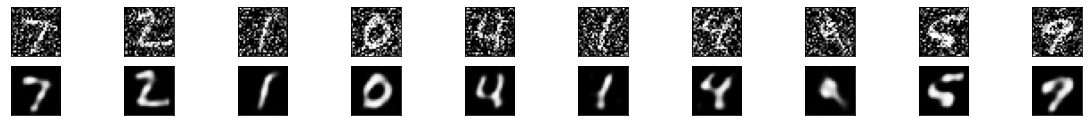

In [7]:
denoise_imgs = autoencoder.predict( x_test_noisy )

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot( 2, n, i + 1 )
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot( 2, n, i + n + 1 )
    plt.imshow( denoise_imgs[i].reshape( 28, 28 ) )
    plt.gray()
    ax.get_xaxis().set_visible( False )
    ax.get_yaxis().set_visible( False )

plt.savefig( 'drive/MyDrive/denoise_128.png' )
plt.show()